In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from fbprophet import Prophet

In [41]:
data = pd.read_csv("C://Users//Admin//Downloads//TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-07,687.000000,691.380005,667.840027,670.969971,670.969971,26309400
1,2021-04-08,677.380005,689.549988,671.650024,683.799988,683.799988,23924300
2,2021-04-09,677.770020,680.969971,669.429993,677.020020,677.020020,21437100
3,2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700
4,2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44652800


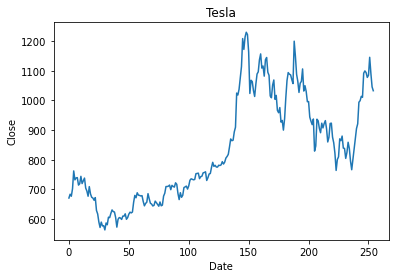

In [42]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [43]:
#data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]
data.describe()

,Close
count,255.000000
mean,830.990468
std,176.161168
min,563.460022
25%,680.510010
50%,781.530029
75%,997.690002
max,1229.910034


In [44]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [45]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Miniconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [46]:
predict = model.make_future_dataframe(periods=365)

In [47]:
forcast = model.predict(predict)

D:\Miniconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Miniconda\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [48]:
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
615,2023-04-03,622.505765,13.940389,1190.219636
616,2023-04-04,616.310141,2.507148,1189.269760
617,2023-04-05,617.277715,9.176881,1221.544596
618,2023-04-06,609.311901,-23.076310,1202.434048
619,2023-04-07,605.401029,-27.841622,1214.298502


Text(0.5, 1.0, 'TESLA stock price estimation')

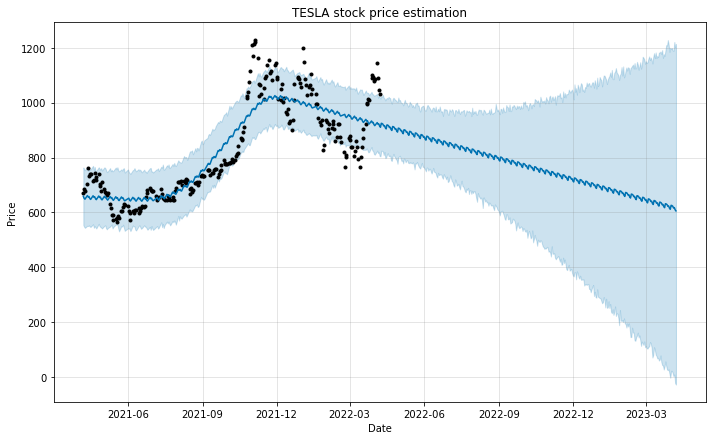

In [49]:
graph = model.plot(forcast, xlabel='Date', ylabel='Price')
plt.title('TESLA stock price estimation')